In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

In [5]:
df = pd.read_csv("car_data.csv")

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

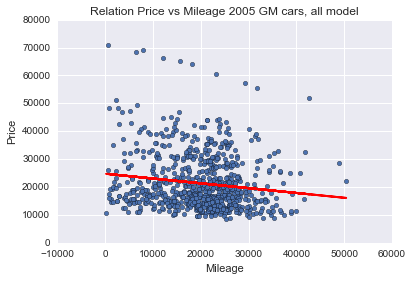

Linear Regression coefficient is [-0.1725205] 
The intercept is  24764.5590061 
The R^2 is  0.0204634473235


In [8]:
mileage = df['Mileage'].reshape(-1,1)
price = df['Price']
reg = linear_model.LinearRegression()
reg.fit(mileage, price)
df.plot(kind='scatter', x='Mileage', y='Price')
plt.plot(mileage, reg.predict(mileage), color='red', linewidth=2)
temp_str = "Relation Price vs Mileage 2005 GM cars, all model"
plt.title(temp_str)
plt.show()
print("Linear Regression coefficient is", reg.coef_, 
      "\nThe intercept is ", reg.intercept_, 
      "\nThe R^2 is ", reg.score(mileage, price))

## Cleaning outlier prices by 3 standard devs

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [9]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


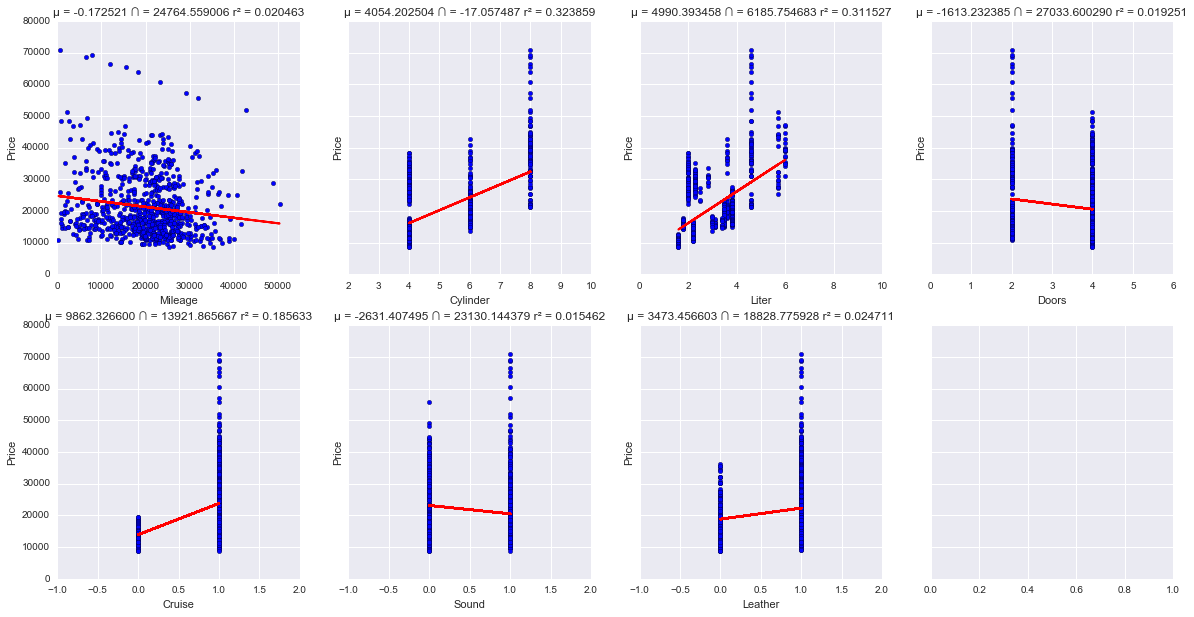

In [10]:
feature_list = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

x0_limit = [0, 2, 0, 0, -1, -1, -1]
x1_limit = [55000, 10, 10, 6, 2, 2, 2]

#regression plot colors
reg_color = 'red'
lw = 2

fig, axs = plt.subplots(2,4, sharey=True, figsize=(20,10))
iterator = 0

for i, item in enumerate(axs):
    for j, item1 in enumerate(item):
        if iterator < len(feature_list):
            
            #pull the column name of feature list
            x_axis = df[feature_list[iterator]]
            
            #Setting up vars for regression
            x_df = x_axis.reshape(-1,1)
            reg = linear_model.LinearRegression()
            
            #Finding the fit. 'price' being pulled from above excersize
            reg.fit(x_df, price)
            
            #plot scatter
            axs[i][j].scatter(x_axis, df.Price)
            
            #plot regression fit
            axs[i][j].plot(x_df, reg.predict(x_df), color=reg_color, linewidth = lw)
            
            #Set max x limit
            axs[i][j].set_xlim(x0_limit[iterator], x1_limit[iterator])

            #Set labels
            axs[i][j].set_xlabel(feature_list[iterator])
            axs[i][j].set_ylabel('Price')
            
            #Print μ (coef), ∩, and r²
            coef = "μ = %2f" %reg.coef_
            inter = "∩ = %2f" %reg.intercept_
            rsqr = "r² = %2f" %reg.score(x_df, price)
            axs[i][j].set_title("{} {} {}".format(coef, inter, rsqr))

            
            #increase the iterator
            iterator+=1


## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [50]:
vec = DictVectorizer(sparse=False)
dict_df = df.to_dict('records')
# vec.fit_transform(dict_df)
# vec.get_feature_names()
vecData = pd.DataFrame(vec.fit_transform(dict_df))
vecData.head()
vecData.columns = vec.get_feature_names()
vecData.head()

,Cruise,Cylinder,Doors,Leather,Liter,Make=Buick,Make=Cadillac,Make=Chevrolet,Make=Pontiac,Make=SAAB,...,Trim=SVM Hatchback 4D,Trim=SVM Sedan 4D,Trim=Sedan 4D,Trim=Special Ed Ultra 4D,Trim=Sportwagon 4D,Type=Convertible,Type=Coupe,Type=Hatchback,Type=Sedan,Type=Wagon
0,1.0,6.0,4.0,1.0,3.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,6.0,4.0,0.0,3.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,6.0,4.0,0.0,3.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,6.0,4.0,0.0,3.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,6.0,4.0,1.0,3.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


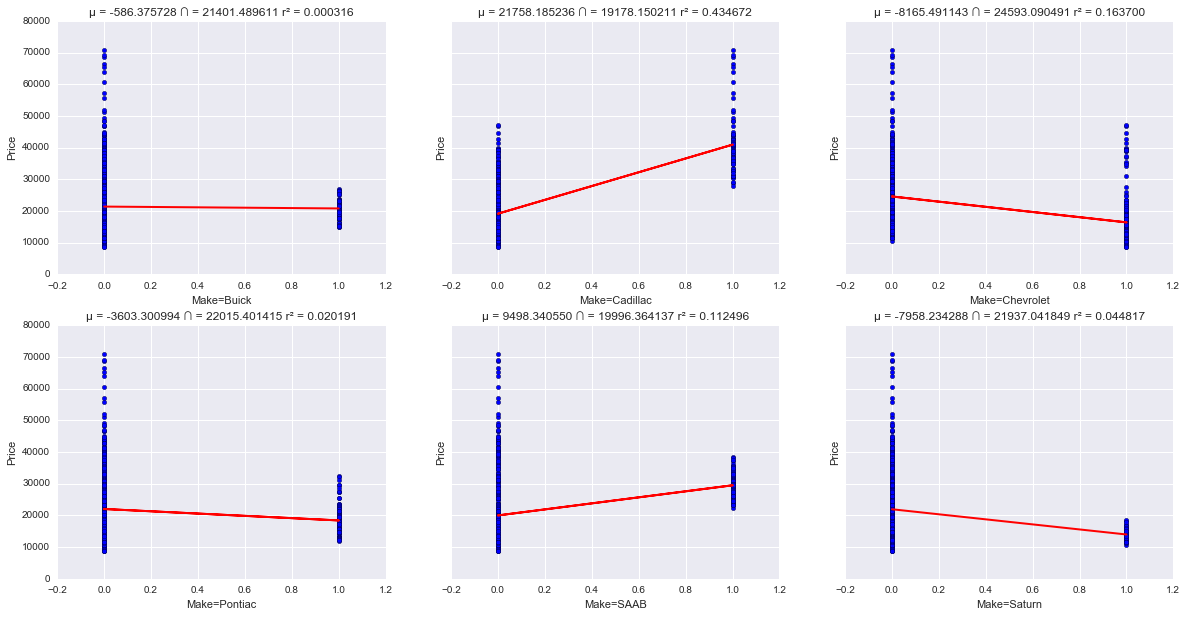

In [61]:
make_list = filter_columns(vecData, 'Make')

iterator = 0

plot_points(2,3, vecData, make_list)

In [ ]:
filter_columns(vecData, )

## Functions

In [36]:
#returns column names that starts with a string.
def filter_columns(data_frame, string):
    return [col for col in list(data_frame) if col.startswith(string)]

In [59]:
#plots scatter, regression, with context data ontop
def plot_points(subr, subc, df, feature_list):
    
    fig, axs = plt.subplots(subr, subc, sharey=True, figsize=(20,10))
    
    
    iterator =0
    for i, item in enumerate(axs):
        for j, item1 in enumerate(item):
            if iterator < len(feature_list):

                #pull the column name of feature list
                x_axis = df[feature_list[iterator]]

                #Setting up vars for regression
                x_df = x_axis.reshape(-1,1)
                reg = linear_model.LinearRegression()

                #Finding the fit. 'price' being pulled from above excersize
                reg.fit(x_df, price)

                #plot scatter
                axs[i][j].scatter(x_axis, df.Price)

                #plot regression fit
                axs[i][j].plot(x_df, reg.predict(x_df), color=reg_color, linewidth = lw)

                #Set max x limit
                #axs[i][j].set_xlim(x0_limit[iterator], x1_limit[iterator])

                #Set labels
                axs[i][j].set_xlabel(feature_list[iterator])
                axs[i][j].set_ylabel('Price')

                #Print μ (coef), ∩, and r²
                coef = "μ = %2f" %reg.coef_
                inter = "∩ = %2f" %reg.intercept_
                rsqr = "r² = %2f" %reg.score(x_df, price)
                axs[i][j].set_title("{} {} {}".format(coef, inter, rsqr))


                #increase the iterator
                iterator+=1
